<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 <br>
<font color=696880 size=4>

*TA: Matin Arman Mehr* <br>
*Email: matinarmanmehr@proton.me* <br>

***If you have any issues or questions, please feel free to email me or send your messages in the Telegram group.***

# Student Information
Fill the desired information here

In [15]:
Student_Name = "Mahyar Abbasi"
Student_ID = "402209767"

print("Student_Name:",Student_Name)
print("Student_ID:",Student_ID)

Student_Name: Mahyar Abbasi
Student_ID: 402209767


# Introduction
Local Field Potential (LFP) signals possess the capability to provide us with highly valuable and detailed insights into the functioning of the brain. In this practice, we will undertake the analysis of the LFP signal derived from the brain of an anesthetized rat during an olfactory task. <br>
The LFP signal that is given to you comprises three distinct channels: <br>

&emsp;  1. Hippocampus (HPC) <br>
&emsp;  2. Olfactory Tubercle (OT) <br>
&emsp;  3. Medial Prefrontal Cortex (mPFC) <br>

Throughout the task, the anesthetized rat was exposed to two different odorants: <br>

&emsp;  1. Banana (tag = "20") <br>
&emsp;  2. Lime (tag = "40") <br>

Each odorant was presented with an equal probability of 50%. This implies that 50% of the time, the rat was exposed to the banana odor, and the remaining 50% to the lime odor. Upon cessation of odorant release, the resting state (tag = "10") commenced, devoid of any odor stimuli. <br>

**Note that the 4th channel is digitalByte which contains the events tags [10,20,40] in time.**

`Theorical Question 1:` Investigate the functions of the LFP channels (HPC, OT, mPFC) in rats brain and write a paragraph for each of them. (**Note: Academic references must be used**). *`5 Points`* <br>

HPC LFP functions of rats brain: HPC is one of the central and essential parts of brain of any species. When it comes to rats brain, it has been proved that, once a rat is going to run across space, search for food, navigate through a maze or remember long-term a spatial experience it had in past. In the case of rats, running across space, strong theta(3-8 Hz) oscillatory activity has been recorded in the hippocampus LFP channel and is considered important for spatial navigation and long-term spatial memory acquisition. Theta sequences have also been demonstrated to predict spatial trajectory during reward-directed behavior.Therefore, the characteristic of HPC LFP channel is the strong theta wave oscillation. Retrieved from "Hippocampal function in rodents", Zemla and Basu.

OT LFP function of rats brain: As one can imply from it's name, this part has a primary role for olfaction task(sensation of smell and searching for food). The olfactory tubercle (OT),a trilaminar structure located in the basal forebrain of mammals is a part of olfactory cortex. As opposed to HPC area, beta and gamma frequency bands are dominant in LFP signal obtained from OT. In fact, gamma waves(60-90 Hz) are present most of the time before odorant stimulation, in particular when animals freely explore their environment, the presence of gamma bursts, regularly nested at the transition between inspiration and expiration characterizes the LFP within this region. Interestingly enough, it is seen that there is a shift from gamma frequency to beta frequency when an odorant is presented to rat. This shift in the oscillatory dynamics between gamma and beta frequencies is characteristic of odorant sampling in awake animals, especially rats and have been reported in numerous studies in the OT. More information is found at this review article : "Beta and gamma oscillatory activities associated with olfactory memory tasks: different rhythms for different functional networks?", Martin and Ravel, 2014.

mPFC LFP function of rats brain: Recent neurological studies have revealed a cruical role of medial prefrontal cortex in working memory processing. PFC also contributes to other cognitive functions such as decision-making, inhibitory control, and motor selection. Evidence has demonstrated that the neural activity of mPFC in theta rhythm plays an essential role in encoding working memory. Theta rhythm activity is proposed as a mechanism to control the disparate neural structures, which integrates the task demanded information into the PFC for guiding the behavior. It has been proved that theta band magnitude is modulated with the spatial working memory during T-maze navigation and correlated with the task completion time. Moreover, in recent studies, links between hippocampus and mPFC have been investigated and importance of the PFC and hippocampus joint activity have been suggested for successful spatial working memory execution. Gamma activity of the mPFC neurons is modulated by the theta rhythm of ventral hippocampus (vHPC). Ref: "Dynamic theta-modulated high frequency oscillations in rat medial prefrontal cortex during spatial working memory task" , Farrokhi et al. 2022.


# Import Libraries

In [1]:
#%pip install pymatreader
#%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pymatreader
import scipy as sp
import pandas as pd
import math

#################################
# Import your necessary libraries
#################################

C:\Users\USER\AppData\Local\Temp\ipykernel_4960\2976072982.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Reading the Data
Import the `data.mat` file that is given to you by using pymatreader library. Add all of the dataset information into the *`data`* dict file. *`5 Points`* 

In [2]:
data = {}
data['srate'] = 2000                            # Sampling rate
data['channel_names'] = ['HPC','OT','mPFC']     # The name of each channel
data['events'] = ['rest','banana','lime']       # Events names
data['tags'] = [10,20,40]                       # Tag of each event

###########################################################
# TO DO: Import the data and add it to the main *data dict 
dataset=pymatreader.read_mat("data.mat")
###########################################################

data=data | dataset

fs=data["srate"]

print(data["channelData"].shape)



(3596943, 4)


# Plot the raw LFP
Let's plot the first `2.5s` of each channels' signal! *`3 Points`*

([<matplotlib.axis.XTick at 0x2625c8d0170>,
 [Text(0, 0, '0'),
  Text(1000, 0, '0.5'),
  Text(2000, 0, '1'),
  Text(3000, 0, '1.5'),
  Text(4000, 0, '2'),
  Text(5000, 0, '2.5')])

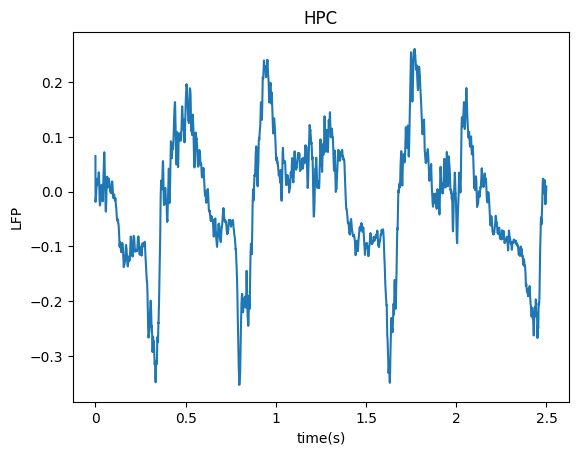

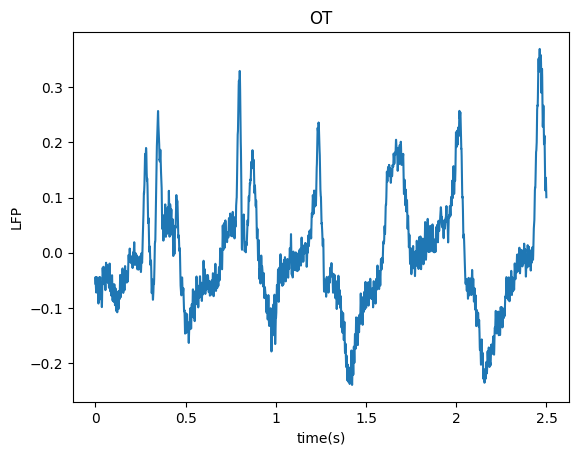

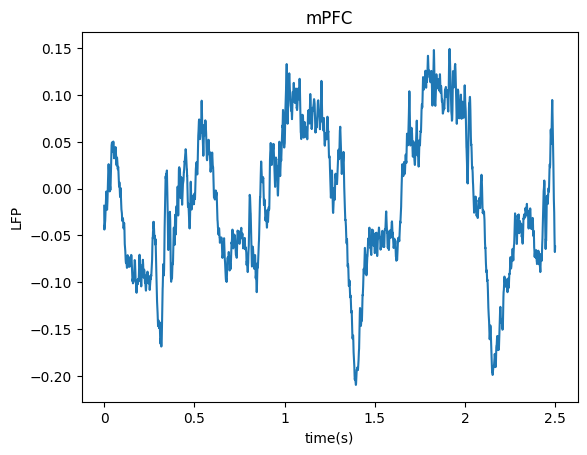

In [18]:

#################################################
# TO DO: plot the raw LFP signal for each channel.
#################################################
x=[0,1000,2000,3000,4000,5000]
labels=[0,0.5,1,1.5,2,2.5]

plt.figure("HPC")
plt.plot(data["channelData"][0:5000,0])
plt.title("HPC")
plt.ylabel("LFP")
plt.xlabel("time(s)")
plt.xticks(x,labels=labels)

plt.figure("OT")
plt.plot(data["channelData"][0:5000,1])
plt.title("OT")
plt.ylabel("LFP")
plt.xlabel("time(s)")
plt.xticks(x,labels=labels)

plt.figure("mPFC")
plt.plot(data["channelData"][0:5000,2])
plt.title("mPFC")
plt.ylabel("LFP")
plt.xlabel("time(s)")
plt.xticks(x,labels=labels)

# Power Spectrum Density (PSD)
Calculate and plot the power spectrum density for the frequency range up to 40Hz in each channel of the raw LFP signals. You can employ a simple FFT for this task. *`5 Points`*

In [3]:
def calc_PSD(data):
    ##############################
    # TO DO: Complete the function
    ##############################
    n=len(data)
    w=np.abs(np.fft.rfft(data))**2
    freq=np.fft.rfftfreq(n,1/fs)
    nn=int(len(w)/24) #values up to 40 HZ

    return freq[0:nn],w[0:nn]


(0.0, 250000000.0)

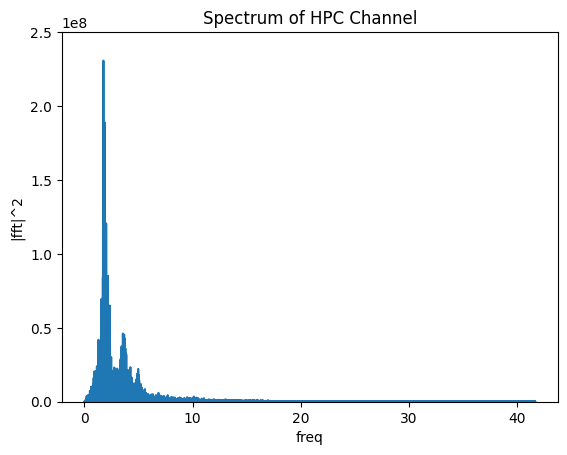

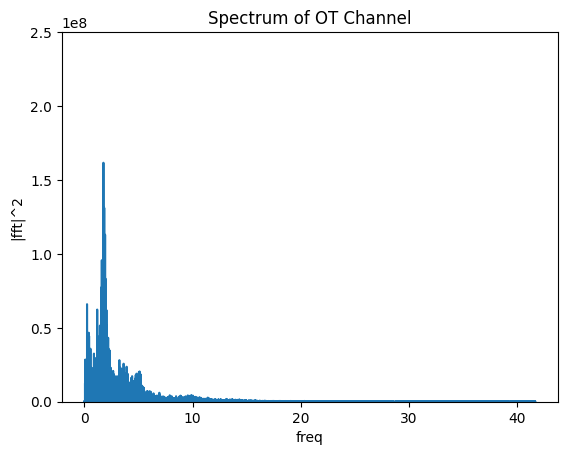

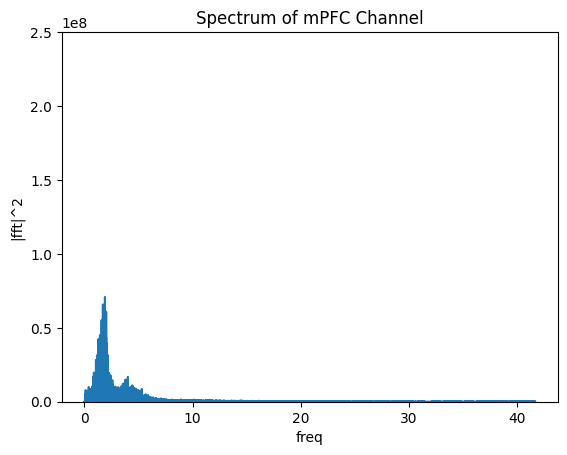

In [20]:

####################################################################
# To Do: Use your function to calculate the PSD and plot the results
####################################################################
f,psd1=calc_PSD(data["channelData"][:,0])
psd2=calc_PSD(data["channelData"][:,1])[1]
psd3=calc_PSD(data["channelData"][:,2])[1]

plt.figure(1)
plt.plot(f,psd1)
plt.title("Spectrum of HPC Channel")
plt.ylabel("|fft|^2")
plt.xlabel("freq")
plt.ylim(0,2.5*10**8)

plt.figure(2)
plt.plot(f,psd2)
plt.title("Spectrum of OT Channel")
plt.ylabel("|fft|^2")
plt.xlabel("freq")
plt.ylim(0,2.5*10**8)

plt.figure(3)
plt.plot(f,psd3)
plt.title("Spectrum of mPFC Channel")
plt.ylabel("|fft|^2")
plt.xlabel("freq")
plt.ylim(0,2.5*10**8)





Compute the average power of the theta band (4Hz-8Hz) for each channel and create a bar plot to display the results. *`2 Points`* <br>

Text(0.5, 1.0, 'Average power of theta band(3-8 Hz)')

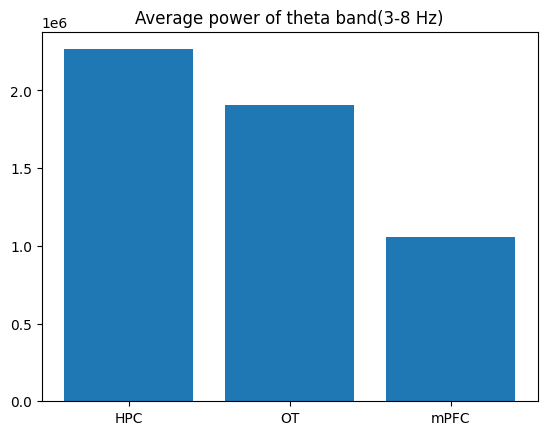

In [21]:

##################################################
# TO DO: Plot the theta band power of each channel
##################################################



w_avg=[0,0,0]
q=np.where((f>3) & (f<8))[0]

for i in q:
    w_avg[0]=w_avg[0]+psd1[i]
    w_avg[1]=w_avg[1]+psd2[i]
    w_avg[2]=w_avg[2]+psd3[i]
w_avg[0]=w_avg[0]/len(q)
w_avg[1]=w_avg[1]/len(q)
w_avg[2]=w_avg[2]/len(q)

x=["HPC","OT","mPFC"]

plt.bar(x,w_avg)
plt.title("Average power of theta band(3-8 Hz)")


The plot should be like this: <br>

![](./Figures/01.png)

`Theorical Question 2:` Why is the theta power is higher in the hippocampus compared to other regions? Do a little research :D *`3 Points`*

It is widely beilived that the core generator of theta wave oscillations is located in hippocampus of any mammal species. And it has been shown that if some other part of cortex exhibits theta wave it is indeed connected to HPC region. Sometimes this type of brain wave is called hippocampal theta rythm, which shows the essential role of HPC in generating this frequency band. HPC has high-density neural layers, so that generates some of the largest EEG signal of any brain structure. In rats, hippocampal theta is seen mainly in two conditions: first, when an animal is running, walking, or in some other way actively interacting with its surroundings; second, during REM sleep(rapid eye movement sleep). The frequency of the theta waves increases as a function of running speed, starting at about 6.5 Hz on the low end, and increasing to about 9 Hz at the fastest running speeds, although higher frequencies are sometimes seen for brief high-velocity movements such as jumps across wide gaps. In larger species of animals, theta frequencies are generally lower.   """ Retrieved from  wikipedia page, "Theta wave" """

# Preprocessing
First thing first, filter each channel between 0.5Hz-128Hz. *`3 Points`* <br>
**Note: Use zero-phase filter to maintain the time features of the signals after filtering.**

In [4]:
def BPF_filter(data,frq_low,frq_high,filt_order=5):
    ##############################
    # To Do: complete the function
    ##############################
    b,a=sp.signal.butter(filt_order,[frq_low,frq_high],fs=fs,btype="band")
    return sp.signal.lfilter(b,a,x=data)


In [23]:
order=4 #maximum possible order for this problem is n=4

data["channelData"][:,0]=BPF_filter(data["channelData"][:,0],0.5,128,order)
data["channelData"][:,1]=BPF_filter(data["channelData"][:,1],0.5,128,order)
data["channelData"][:,2]=BPF_filter(data["channelData"][:,2],0.5,128,order)


Next, epoch the data according to each event (banana and lime) as you've done at the previous practice. Each trial must contain `1.5` seconds before and `3` seconds after the onset of each stimulus. Consider computing zscore of time series in each trial. *`3 Points`*

In [5]:
def epoch_data(data):

    ##############################
    # To Do: complete the function
    ##############################
    data_epoched={}
    data_epoched["Banana"]={"ch1":[],"ch2":[],"ch3":[]}
    data_epoched["Lime"]={"ch1":[],"ch2":[],"ch3":[]}

    d=data["channelData"][:,3]
    for i in range(1,len(d)):
        if ((np.abs(d[i-1]-20)>0.01) and (np.abs(d[i]-20)<0.01)):
            data_epoched["Banana"]["ch1"].append(data["channelData"][i-3000:i+6000,0])
            data_epoched["Banana"]["ch2"].append(data["channelData"][i-3000:i+6000,1])
            data_epoched["Banana"]["ch3"].append(data["channelData"][i-3000:i+6000,2])
        if ((np.abs(d[i-1]-40)>0.01) and (np.abs(d[i]-40)<0.01)):
            data_epoched["Lime"]["ch1"].append(data["channelData"][i-3000:i+6000,0])
            data_epoched["Lime"]["ch2"].append(data["channelData"][i-3000:i+6000,1])
            data_epoched["Lime"]["ch3"].append(data["channelData"][i-3000:i+6000,2]) 
    
    return data_epoched

In [6]:
#extracting trials, it takes lots of seconds to compute...
data_epoched=epoch_data(data)

In [7]:
#z-score normalization

n_ban=len(data_epoched["Banana"]["ch1"])
n_lim=len(data_epoched["Lime"]["ch1"])

for i in range(n_ban):
    miu=np.mean(data_epoched["Banana"]["ch1"][i])
    sigma=np.std(data_epoched["Banana"]["ch1"][i])
    data_epoched["Banana"]["ch1"][i]=(data_epoched["Banana"]["ch1"][i]-miu)/sigma

    miu=np.mean(data_epoched["Banana"]["ch2"][i])
    sigma=np.std(data_epoched["Banana"]["ch2"][i])
    data_epoched["Banana"]["ch2"][i]=(data_epoched["Banana"]["ch2"][i]-miu)/sigma

    miu=np.mean(data_epoched["Banana"]["ch3"][i])
    sigma=np.std(data_epoched["Banana"]["ch3"][i])
    data_epoched["Banana"]["ch3"][i]=(data_epoched["Banana"]["ch3"][i]-miu)/sigma

for i in range(n_lim):
    miu=np.mean(data_epoched["Lime"]["ch1"][i])
    sigma=np.std(data_epoched["Lime"]["ch1"][i])
    data_epoched["Lime"]["ch1"][i]=(data_epoched["Lime"]["ch1"][i]-miu)/sigma

    miu=np.mean(data_epoched["Lime"]["ch2"][i])
    sigma=np.std(data_epoched["Lime"]["ch2"][i])
    data_epoched["Lime"]["ch2"][i]=(data_epoched["Lime"]["ch2"][i]-miu)/sigma

    miu=np.mean(data_epoched["Lime"]["ch3"][i])
    sigma=np.std(data_epoched["Lime"]["ch3"][i])
    data_epoched["Lime"]["ch3"][i]=(data_epoched["Lime"]["ch3"][i]-miu)/sigma   

  

# Event-Related Potential (ERP)
Compute the Event-Related Potential (ERP) for each channel and event in all channels as you've done at the previous practice. Plot them for each event. *`5 Points`* <br>
 **Note: Consider using baseline rejection: ERP_signal - mean(ERP_signal(before stimulus))**

In [8]:
def calc_ERP(data):

    ##############################
    # To Do: complete the function
    ##############################
    #Banana
    od="Banana"
    erp={"Banana":{},"Lime":{}}
   
    x=["ch1","ch2","ch3"]
    for c in x:
        arr=np.zeros(9000)
        for i in range(len(data[od][c])):
            arr=arr+data[od][c][i]
        arr=(arr-np.mean(arr[0:3000]))/np.std(arr)
        erp[od][c]=arr

    #Lime
    od="Lime"
    x=["ch1","ch2","ch3"]
    for c in x:
        arr=np.zeros(9000)
        for i in range(len(data[od][c])):
            arr=arr+data[od][c][i]
        arr=(arr-np.mean(arr[0:3000]))/np.std(arr)
        erp[od][c]=arr      

    return erp

<class 'dict'>


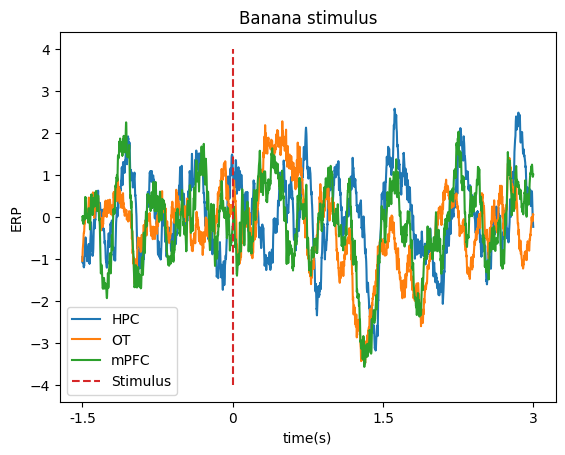

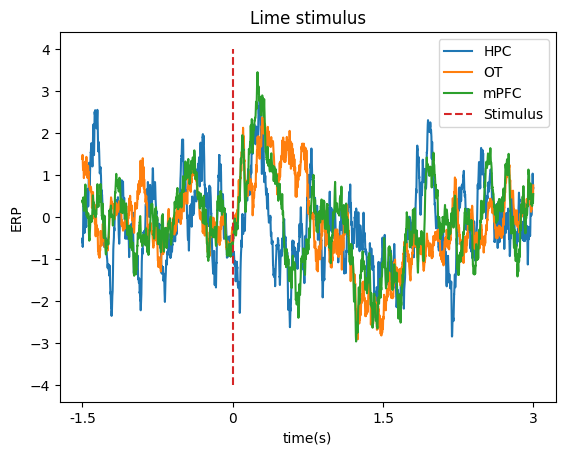

In [9]:
erp=calc_ERP(data_epoched)

s_y=np.arange(-4,4.2,0.2)
s_x=np.zeros(len(s_y))+3000
####################################################################
# To Do: Use your function to calculate the ERP and plot the results
####################################################################
plt.figure("Banana")
plt.plot(erp["Banana"]["ch1"],label="HPC")
plt.plot(erp["Banana"]["ch2"],label="OT")
plt.plot(erp["Banana"]["ch3"],label="mPFC")
plt.plot(s_x,s_y,label="Stimulus",linestyle="--")
plt.title("Banana stimulus")
plt.ylabel("ERP")
plt.xlabel("time(s)")
plt.xticks([0,3000,6000,9000-1],["-1.5","0","1.5","3"])
plt.legend()

plt.figure("Lime")
plt.plot(erp["Lime"]["ch1"],label="HPC")
plt.plot(erp["Lime"]["ch2"],label="OT")
plt.plot(erp["Lime"]["ch3"],label="mPFC")
plt.plot(s_x,s_y,label="Stimulus",linestyle="--")
plt.title("Lime stimulus")
plt.ylabel("ERP")
plt.xlabel("time(s)")
plt.xticks([0,3000,6000,9000-1],["-1.5","0","1.5","3"])
plt.legend()

#erp is a dictionary type variable which contains erp of different stimulus of different regions
print(type(erp))

In [ ]:
###saving resting_state signals
"""
data_matrix=np.empty((3000,6))
i=0
for s in ["Banana","Lime"]:
    for ch in ["ch1","ch2","ch3"]:

        data_matrix[:,i]=BPF_filter(erp[s][ch],0.5,100,2)
        i+=1

np.savetxt("LFP_resting_state",data_matrix)"
"""
  

You should generate a plot like this for each odorant: <br>

![](./Figures/03-ERP-ban.png)

# Phase-Lock Value (PLV)

In the previous practice, you studied the phase-lock value as a method for evaluation of functional connectivity between different parts of brain. Now, we aim to implement it for the olfactory task and investigate the effect of odorants on the connections between channels. You can use [this paper](https://doi.org/10.1016%2Fj.neuroimage.2013.02.008) for more help. <br>

Compute the phase-lock value between different channels for `1.5sec` before and `1.5sec` after the onset of the stimulus for each trials across a frequency range of `20Hz-60Hz` for both odorants. Next, determine the mean and standard error of the calculated phase-lock values across trials. At the end, create a plot showing the bounded lines for phase-lock values at various frequencies. Compare the results before and after stimulus. *`20 Points`*

In [15]:
def calc_PLV(data1,data2,frq_range,time_range,filt_order):

    ##############################
    # To Do: complete the function
    ##############################
    if time_range>0:
        s1=data1[3000:6000]
        s2=data2[3000:6000]
    else:
        s1=data1[0:3000]
        s2=data2[0:3000]
    
    s1=BPF_filter(s1,frq_range[0],frq_range[1],filt_order)
    s2=BPF_filter(s2,frq_range[0],frq_range[1],filt_order)

    s1=sp.signal.hilbert(s1)
    s2=sp.signal.hilbert(s2)

    phase=np.angle(s1)-np.angle(s2)

    return np.abs(np.sum(np.exp(1j*phase)))/len(phase)

    

Text(0.5, 1.0, 'Phase locking between HPC and mPFC stimulated by "lime" odorant')

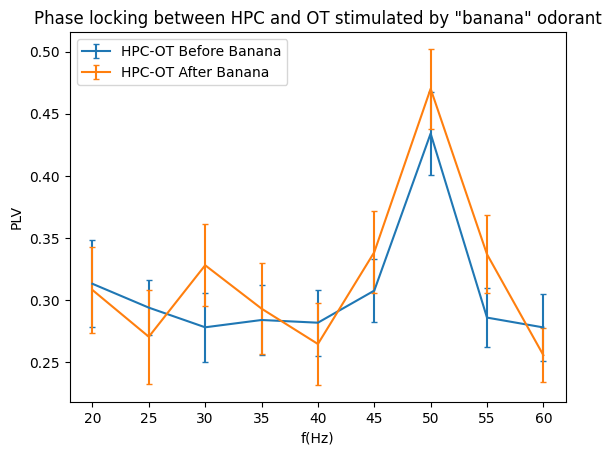

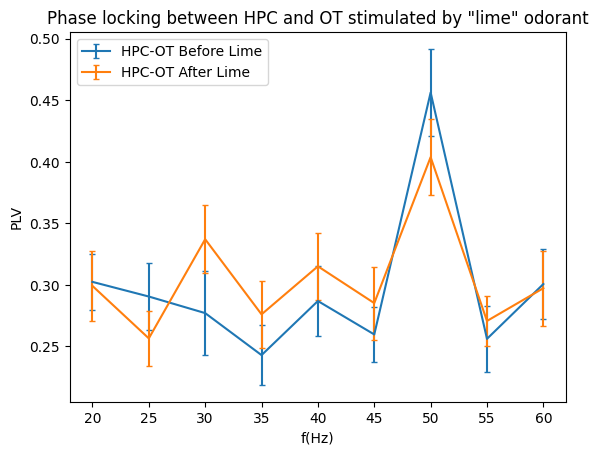

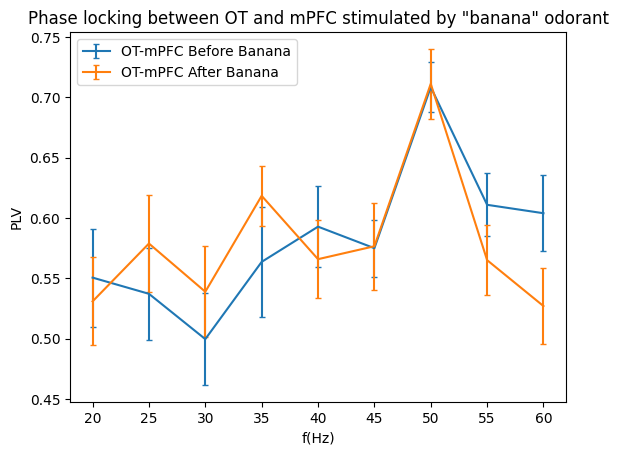

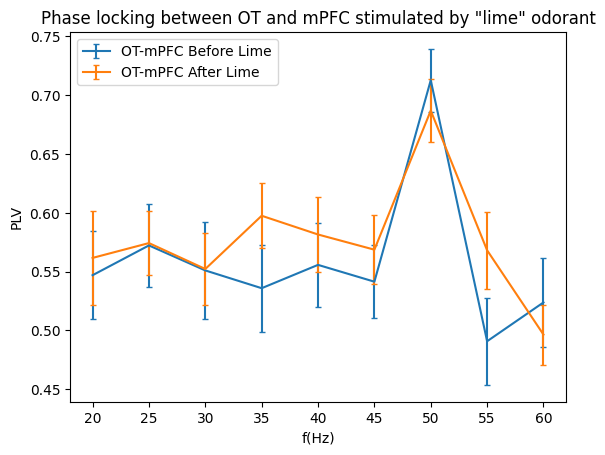

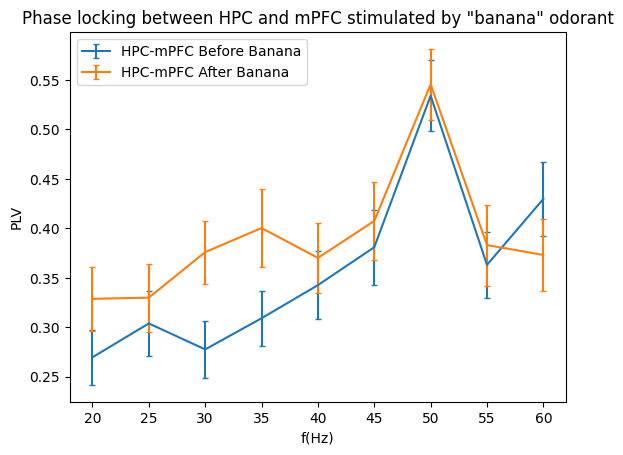

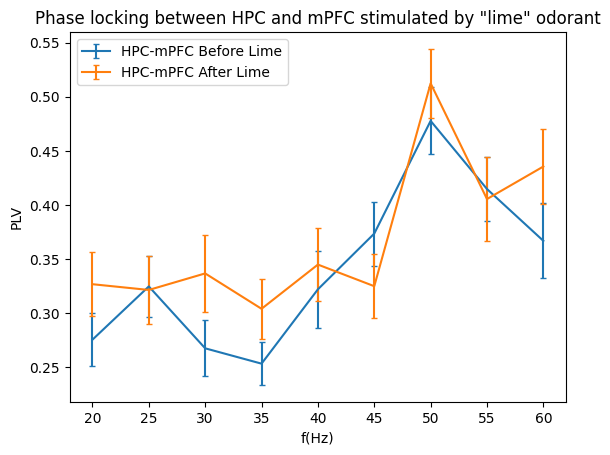

In [16]:

####################################################################
# To Do: Use your function to calculate the PLV and plot the results
####################################################################

#calculating plv: there are three identical piece of code written to calculate list of plv, errors, and to create plots.

#HPC and OT

r1="ch1"
r2="ch2"
n=24 #number of banana trials
m=26 #number of lime trials
f=np.arange(20,65,5)

p_b20=np.array([])
err_b20=np.array([])
p_a20=np.array([])
err_a20=np.array([])

p_b40=np.array([])
err_b40=np.array([])
p_a40=np.array([])
err_a40=np.array([])

for i in range(len(f)):
    s_b20=np.zeros(n)
    s_a20=np.zeros(n)
    s_b40=np.zeros(m)
    s_a40=np.zeros(m)

    for j in range(n):
        s_b20[j]=calc_PLV(data_epoched["Banana"][r1][j],data_epoched["Banana"][r2][j],[f[i]-2.5,f[i]+2.5],-1.5,4)
        s_a20[j]=calc_PLV(data_epoched["Banana"][r1][j],data_epoched["Banana"][r2][j],[f[i]-2.5,f[i]+2.5],+1.5,4)
    for j in range(m):
        s_b40[j]=calc_PLV(data_epoched["Lime"][r1][j],data_epoched["Lime"][r2][j],[f[i]-2.5,f[i]+2.5],-1.5,4)
        s_a40[j]=calc_PLV(data_epoched["Lime"][r1][j],data_epoched["Lime"][r2][j],[f[i]-2.5,f[i]+2.5],+1.5,4)


    p_b20=np.append(p_b20,np.mean(s_b20))
    err_b20=np.append(err_b20,np.std(s_b20)/np.sqrt(n))
    p_a20=np.append(p_a20,np.mean(s_a20))
    err_a20=np.append(err_a20,np.std(s_a20)/np.sqrt(n)) 

    p_b40=np.append(p_b40,np.mean(s_b40))
    err_b40=np.append(err_b40,np.std(s_b40)/np.sqrt(m))
    p_a40=np.append(p_a40,np.mean(s_a40))
    err_a40=np.append(err_a40,np.std(s_a40)/np.sqrt(m))   


plt.figure(1)
plt.errorbar(f,p_b20,yerr=err_b20,capsize=2,label="HPC-OT Before Banana")
plt.errorbar(f,p_a20,yerr=err_a20,capsize=2,label="HPC-OT After Banana")
plt.legend()
plt.ylabel("PLV")
plt.xlabel("f(Hz)")
plt.title("Phase locking between HPC and OT stimulated by \"banana\" odorant")

plt.figure(2)
plt.errorbar(f,p_b40,yerr=err_b40,capsize=2,label="HPC-OT Before Lime")
plt.errorbar(f,p_a40,yerr=err_a40,capsize=2,label="HPC-OT After Lime")
plt.legend()
plt.ylabel("PLV")
plt.xlabel("f(Hz)")
plt.title("Phase locking between HPC and OT stimulated by \"lime\" odorant")


#OT and mPFC
r1="ch2"
r2="ch3"
n=24 #number of banana trials
m=26 #number of lime trials
f=np.arange(20,65,5)

p_b20=np.array([])
err_b20=np.array([])
p_a20=np.array([])
err_a20=np.array([])

p_b40=np.array([])
err_b40=np.array([])
p_a40=np.array([])
err_a40=np.array([])

for i in range(len(f)):
    s_b20=np.zeros(n)
    s_a20=np.zeros(n)
    s_b40=np.zeros(m)
    s_a40=np.zeros(m)

    for j in range(n):
        s_b20[j]=calc_PLV(data_epoched["Banana"][r1][j],data_epoched["Banana"][r2][j],[f[i]-2.5,f[i]+2.5],-1.5,4)
        s_a20[j]=calc_PLV(data_epoched["Banana"][r1][j],data_epoched["Banana"][r2][j],[f[i]-2.5,f[i]+2.5],+1.5,4)
    for j in range(m):
        s_b40[j]=calc_PLV(data_epoched["Lime"][r1][j],data_epoched["Lime"][r2][j],[f[i]-2.5,f[i]+2.5],-1.5,4)
        s_a40[j]=calc_PLV(data_epoched["Lime"][r1][j],data_epoched["Lime"][r2][j],[f[i]-2.5,f[i]+2.5],+1.5,4)


    p_b20=np.append(p_b20,np.mean(s_b20))
    err_b20=np.append(err_b20,np.std(s_b20)/np.sqrt(n))
    p_a20=np.append(p_a20,np.mean(s_a20))
    err_a20=np.append(err_a20,np.std(s_a20)/np.sqrt(n)) 

    p_b40=np.append(p_b40,np.mean(s_b40))
    err_b40=np.append(err_b40,np.std(s_b40)/np.sqrt(m))
    p_a40=np.append(p_a40,np.mean(s_a40))
    err_a40=np.append(err_a40,np.std(s_a40)/np.sqrt(m))   


plt.figure(3)
plt.errorbar(f,p_b20,yerr=err_b20,capsize=2,label="OT-mPFC Before Banana")
plt.errorbar(f,p_a20,yerr=err_a20,capsize=2,label="OT-mPFC After Banana")
plt.legend()
plt.ylabel("PLV")
plt.xlabel("f(Hz)")
plt.title("Phase locking between OT and mPFC stimulated by \"banana\" odorant")

plt.figure(4)
plt.errorbar(f,p_b40,yerr=err_b40,capsize=2,label="OT-mPFC Before Lime")
plt.errorbar(f,p_a40,yerr=err_a40,capsize=2,label="OT-mPFC After Lime")
plt.legend()
plt.ylabel("PLV")
plt.xlabel("f(Hz)")
plt.title("Phase locking between OT and mPFC stimulated by \"lime\" odorant")


#HPC and mPFC
r1="ch1"
r2="ch3"
n=24 #number of banana trials
m=26 #number of lime trials
f=np.arange(20,65,5)

p_b20=np.array([])
err_b20=np.array([])
p_a20=np.array([])
err_a20=np.array([])

p_b40=np.array([])
err_b40=np.array([])
p_a40=np.array([])
err_a40=np.array([])

for i in range(len(f)):
    s_b20=np.zeros(n)
    s_a20=np.zeros(n)
    s_b40=np.zeros(m)
    s_a40=np.zeros(m)

    for j in range(n):
        s_b20[j]=calc_PLV(data_epoched["Banana"][r1][j],data_epoched["Banana"][r2][j],[f[i]-2.5,f[i]+2.5],-1.5,4)
        s_a20[j]=calc_PLV(data_epoched["Banana"][r1][j],data_epoched["Banana"][r2][j],[f[i]-2.5,f[i]+2.5],+1.5,4)
    for j in range(m):
        s_b40[j]=calc_PLV(data_epoched["Lime"][r1][j],data_epoched["Lime"][r2][j],[f[i]-2.5,f[i]+2.5],-1.5,4)
        s_a40[j]=calc_PLV(data_epoched["Lime"][r1][j],data_epoched["Lime"][r2][j],[f[i]-2.5,f[i]+2.5],+1.5,4)


    p_b20=np.append(p_b20,np.mean(s_b20))
    err_b20=np.append(err_b20,np.std(s_b20)/np.sqrt(n))
    p_a20=np.append(p_a20,np.mean(s_a20))
    err_a20=np.append(err_a20,np.std(s_a20)/np.sqrt(n)) 

    p_b40=np.append(p_b40,np.mean(s_b40))
    err_b40=np.append(err_b40,np.std(s_b40)/np.sqrt(m))
    p_a40=np.append(p_a40,np.mean(s_a40))
    err_a40=np.append(err_a40,np.std(s_a40)/np.sqrt(m))   


plt.figure(5)
plt.errorbar(f,p_b20,yerr=err_b20,capsize=2,label="HPC-mPFC Before Banana")
plt.errorbar(f,p_a20,yerr=err_a20,capsize=2,label="HPC-mPFC After Banana")
plt.legend()
plt.ylabel("PLV")
plt.xlabel("f(Hz)")
plt.title("Phase locking between HPC and mPFC stimulated by \"banana\" odorant")

plt.figure(6)
plt.errorbar(f,p_b40,yerr=err_b40,capsize=2,label="HPC-mPFC Before Lime")
plt.errorbar(f,p_a40,yerr=err_a40,capsize=2,label="HPC-mPFC After Lime")
plt.legend()
plt.ylabel("PLV")
plt.xlabel("f(Hz)")
plt.title("Phase locking between HPC and mPFC stimulated by \"lime\" odorant")

As you can see, there is a distinct and strong synchronization about 50 Hz between all regions!

You should generate plots like this between all channels for both odorants:<br>

![](./Figures/02-PLV.png)

# Phase-Amplitude Coupling (PAC)

One of the recent methods used for studying functional connectivity is Phase-Amplitude Coupling (PAC). This method is widely used to explain the way of communication among various neural populations in the brain. For more detailed information on PAC and how it's calculated, you can refer to [this paper](https://doi.org/10.1038/s41598-019-48870-2). Moreover, [this paper](https://doi.org/10.1038/s41598-019-43272-w) has also explained how different neural networks communicate through their theta and gamma oscillations to transfer information.

`Theorical Question 3:` Read both papers and explain the process of calculating PAC and how we infer PAC as a metric for communication between different neural oscillations. `5 Points`

**Note: You don't have to read both papers in detail; just simply collect the information you NEED :D**

Inter-regional Phase-Amplitude coupling is a non-symmetrical quantity that is calculated to measure directional connectivity between two regions of the brain. It is widely beilived that ir-PAC increseas when some post-synaptic currents transmitted in first region causes some neuronal population fire(generating action potential) from second region. Therefore ir-PAC unlike cross-correlation methods conveys causal information between two different brain parts. In this view, PAC methods are highly valuable for studying functional connectivities. PAC relates two distinct frequency bands, in other words, phase of low band freqency(representing dendritic post-potentials) is coupled to amplitude of gamma band frequency(spiking).
There is another type of PAC value which is called local PAC(l-PAC) and indicates the coupling between low theta wave and gamma wave brain processes within a single area of brain(e.g. l-PAC of HPC). Generally, one can say PAC metrics indicates the interaction strength between different brain oscillatory modes.

Now, we aim to analyze the data and compute the Phase-Amplitude Coupling (PAC) for each channel. First thing first, as explained in [the paper](https://doi.org/10.1038/s41598-019-48870-2) you've read, we need to find the Bilinear time–frequency distribution of the signal using the RID-Rihaczek method. The code for this is provided below:

In [17]:
## DON'T CHANGE THE CODES OF THIS BLOCK

def _rhu(n):
    '''
    Return integer rounded of the input. The half will round up.
    1.3 -> 1
    2.5 -> 3
    -0.5 -> 0
    -0.3 -> -1
    '''
    return int(math.floor(n + 0.5))


def _datawrap(x: np.ndarray, n: int) -> np.ndarray:
    '''
    The calculation of signal spectrum, such as periodogram, uses FFT internally, 
    where the length of FFT is denoted as NFFT. In theory, when using FFT, 
    the signal in both time domain and frequency domain are discrete and periodic, 
    where the period is given by NFFT. Hence, if you specify an NFFT that is less 
    than the signal length, it actually introduces the aliasing in the time domain 
    and make the signal (even if its length is N>NFFT) periodic with NFFT. 
    When you take FFT of this sequence, you are working with this aliased sequence. 
    This is what datawrap do for you. 

    For example: Sequence 1 2 3 4 5, period 5, it returns
        1 2 3 4 5
                  1 2 3 4 5
                            1 2 3 4 5
        --------------------------------
              ... 1 2 3 4 5 ...

    i.e., original series. assume a period of 3, then it looks like

        1 2 3 4 5
              1 2 3 4 5
                    1 2 3 4 5
        ------------------------
          ... 5 7 3 ...

    A sequence that is wrapped around and has only a length of 3.

    >>> _datawrap(range(1, 6),3)
    array([5, 7, 3])

    '''
    return np.array([sum(x[i::n]) for i in range(n)])


def _chwi_krn(D: np.ndarray, L: np.ndarray, A: int = None):
    '''

    CHWI_KRN Choi-Williams kernel function.

    https://en.wikipedia.org/wiki/Bilinear_time%E2%80%93frequency_distribution#Choi%E2%80%93Williams_distribution_function

    K = _chwi_krn(D, L, A) returns the values K of the Choi-Williams kernel function
    evaluated at the doppler-values in matrix D and the lag-values in matrix L.
    Matrices D and L must have the same size. The values in D should be in the range
    between -1 and +1 (with +1 being the Nyquist frequency). The parameter A is
    optional and controls the "diagonal bandwidth" of the kernel. Matrix K is of the
    same size as the matrices D and L. Parameter A defaults to 10 if omitted.

    Copyright (c) 1998 by Robert M. Nickel
    Revision: 1.1.1.1
    Date: 2001/03/05 09:09:36

    Written by: Mahdi Kiani, March 2021

    '''

    if A is None:
        A = 10
    K = np.exp((-1/(A*A)) * (D*D*L*L))

    return K

def rid_rihaczek(x: np.ndarray, fbins: int):
    '''
    Munia, T.T.K., Aviyente, S. Time-Frequency Based Phase-Amplitude
    Coupling Measure For Neuronal Oscillations. Sci Rep 9, 12441 (2019).
    https://doi.org/10.1038/s41598-019-48870-2

    This function computes reduced interference Rihaczek distribution

    Parameter:
        x: signal
        fbins=required frequency bins

    Returns:
        tfd = Generated reduced interference Rihaczek distribution

    Written by: Mahdi Kiani, March 2021
    '''

    tbins = x.shape[0]
    amb = np.zeros((tbins, tbins))
    for tau in range(tbins):
        amb[tau, :] = (np.conj(x) * np.concatenate((x[tau:], x[:tau])))

    ambTemp = np.concatenate(
        (amb[:, _rhu(tbins/2):], amb[:, :_rhu(tbins/2)]), axis=1)
    amb1 = np.concatenate(
        (ambTemp[_rhu(tbins/2):, :], ambTemp[:_rhu(tbins/2), :]), axis=0)

    D = np.outer(np.linspace(-1, 1, tbins), np.linspace(-1, 1, tbins), )
    K = _chwi_krn(D, D, 0.01)
    df = K[:amb1.shape[0], :amb1.shape[1]]
    ambf = amb1 * df

    A = np.zeros((fbins, tbins))
    tbins = tbins - 1

    if tbins != fbins:
        for tt in range(tbins):
            A[:, tt] = _datawrap(ambf[:, tt], fbins)
    else:
        A = ambf

    tfd = np.fft.fft(A, axis=0)

    return tfd

Next, compute the local Phase-Amplitude Coupling (l-PAC) within each channel and the inter-regional PAC (ir-PAC) across different channels for **ERP signals** Calculate these values for each phase and amplitude frequency within a time interval of `1sec` before and `1sec` after the onset of stimulation for both odorants. The phase frequency should be in the theta band `4Hz-8Hz`, and the amplitude frequency should be in the low gamma band `20Hz-60Hz`. Afterwards, plot the comodulograms ([f_phase, f_amplitude, PAC] plot) and compare the results before and after the stimulus. *`20 Points`* <br>

**Note: Ensure that the scale of PACs in plots is equalized before and after the stimulus to make them comparable.** 

In [18]:
def calc_MVL(tfd1, tfd2, fph, famp):
    #this function calculates the coupling between phase of signal 1 and amplitude of signal 2.
    
    n=len(tfd1[0])
    s=0
    
    for i in range(n):
        s=s+tfd2[int(famp),i]*np.exp(1j*np.angle(tfd1[int(fph),i]))

    return np.abs(s)/n


def calc_PAC(erp1,erp2, fph_range, famp_range, time_range):
    #this function gives a matrix of MVL

    c1=rid_rihaczek(erp1[int((time_range[0]+1.5)*fs):int((time_range[1]+1.5)*fs)],fs)
    c2=rid_rihaczek(erp2[int((time_range[0]+1.5)*fs):int((time_range[1]+1.5)*fs)],fs)

    n=int(famp_range[1]-famp_range[0])+1
    m=int(fph_range[1]-fph_range[0])+1      
    pac=np.empty((n,m))

    for i in range(n):
        for j in range(m):
            pac[i,j]=calc_MVL(c1,c2,fph_range[0]+j,famp_range[1]-i)

    return pac

In [19]:
def PAC_plot(stimulus,c1,c2):

    pac_b=calc_PAC(erp[stimulus][c1],erp[stimulus][c2],[4,8],[20,60],[-1,0])
    pac_a=calc_PAC(erp[stimulus][c1],erp[stimulus][c2],[4,8],[20,60],[0,1])
    dict={"ch1":"HPC","ch2":"OT","ch3":"mPFC"}
    min1=np.min(pac_b)
    min2=np.min(pac_a)
    max1=np.max(pac_b)
    max2=np.max(pac_a)

    fig,axes=plt.subplots(1,2,figsize=(10,4))

    im1=axes[0].imshow(pac_b,aspect="auto",interpolation="quadric",cmap="rainbow",vmin=np.min([min1,min2]),vmax=np.max([max1,max2]))
    axes[0].set_ylabel("famp")
    axes[0].set_yticks(np.arange(0,45,5),np.arange(60,15,-5))
    axes[0].set_xlabel("fph")
    axes[0].set_xticks(np.arange(0,5),np.arange(4,9))
    axes[0].set_title("PAC before "+stimulus+" stimulus between phase of "+dict[c1]+" and amplitude of "+dict[c2],fontsize=9)
    im2=axes[1].imshow(pac_a,aspect="auto",interpolation="quadric",cmap="rainbow",vmin=np.min([min1,min2]),vmax=np.max([max1,max2]))
    
    axes[1].set_ylabel("famp")
    axes[1].set_yticks(np.arange(0,45,5),np.arange(60,15,-5))
    axes[1].set_xlabel("fph")
    axes[1].set_xticks(np.arange(0,5),np.arange(4,9))
    axes[1].set_title("PAC after "+stimulus+" stimulus between phase of "+dict[c1]+" and amplitude of "+dict[c2],fontsize=9)
    fig.colorbar(im1,ax=axes[0])

    fig.colorbar(im2,ax=axes[1])
    
    
    plt.tight_layout()

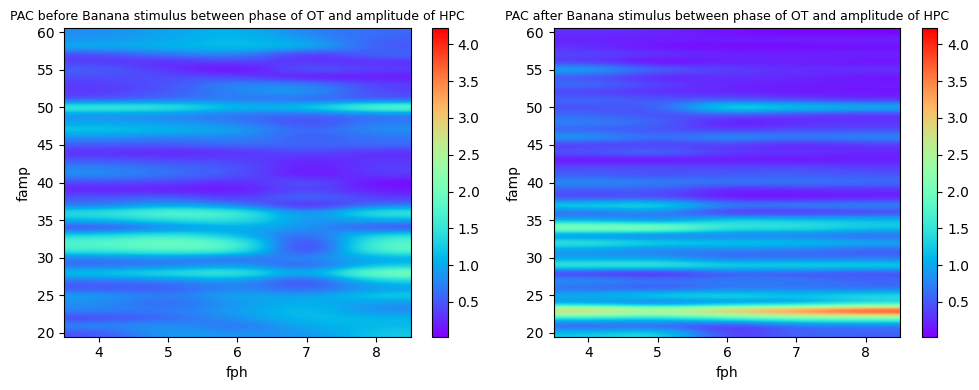

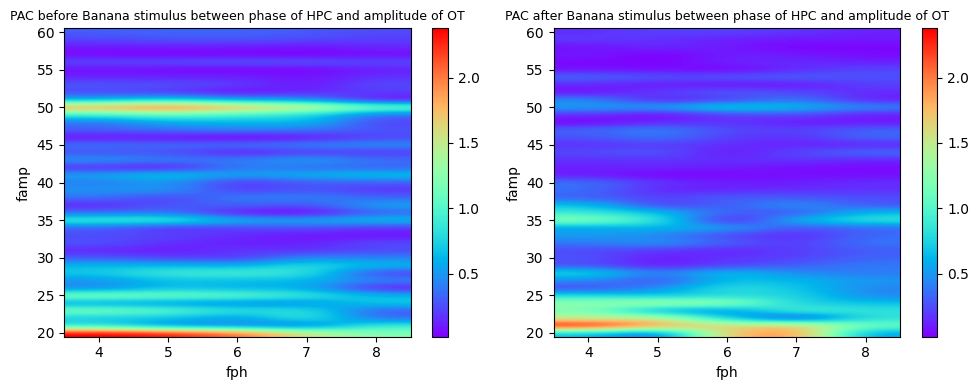

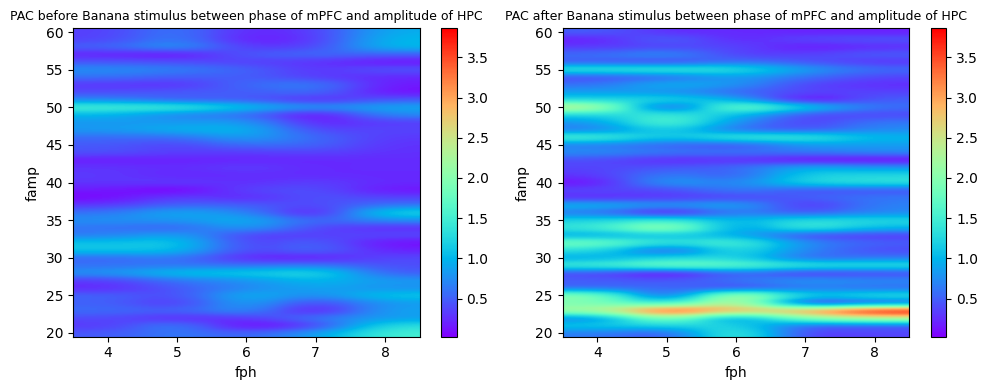

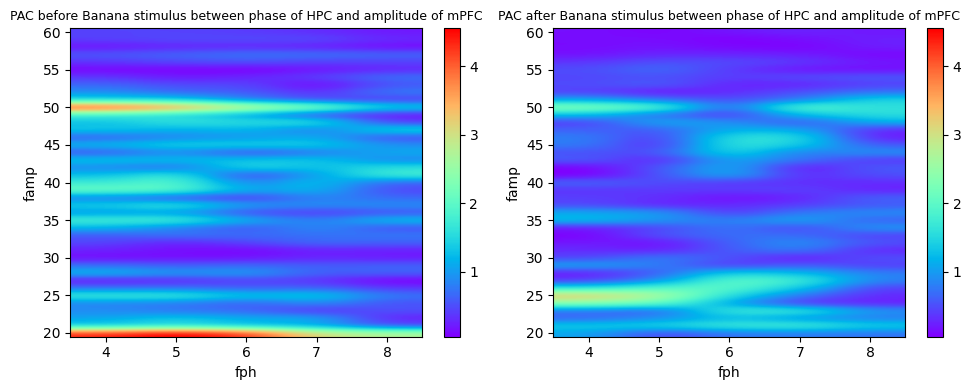

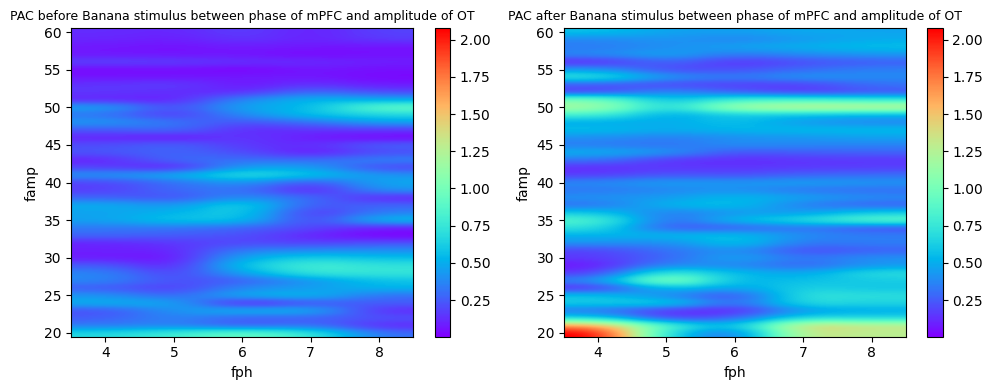

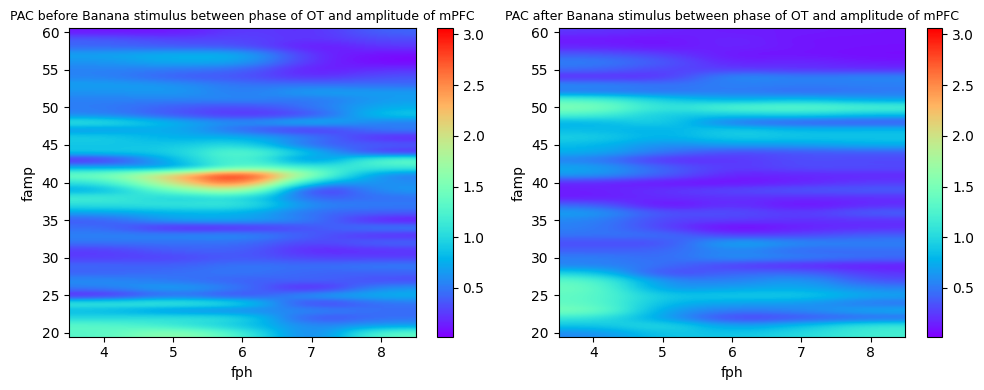

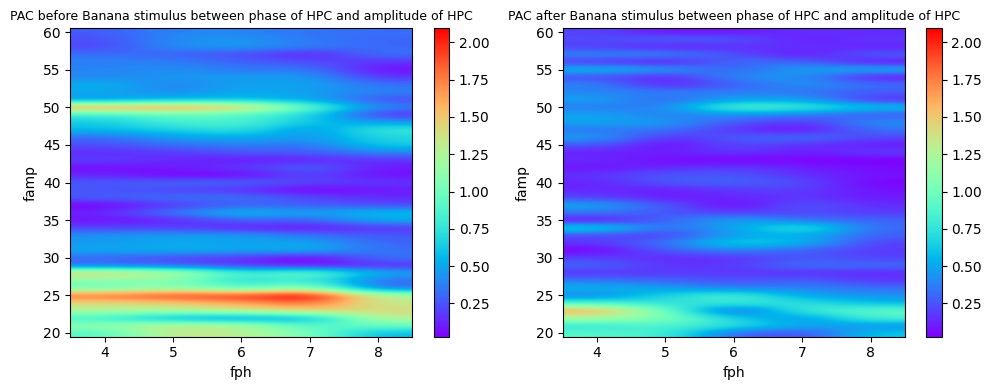

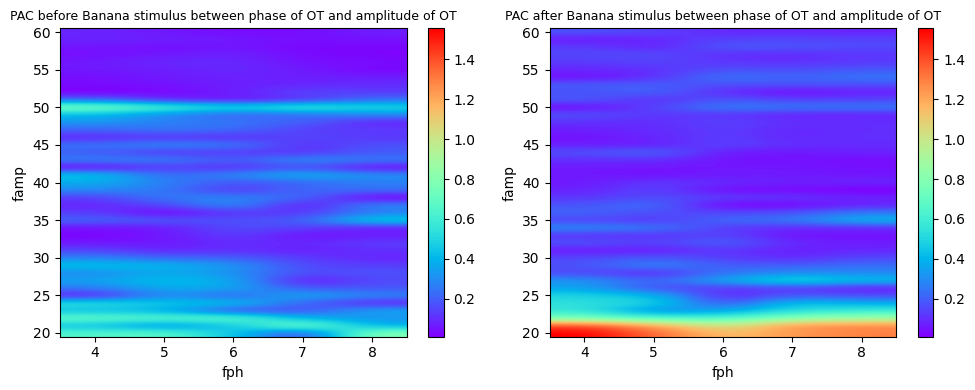

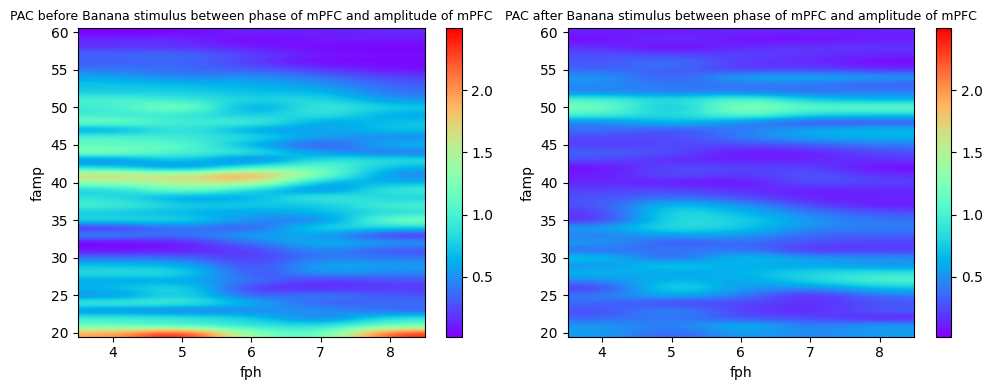

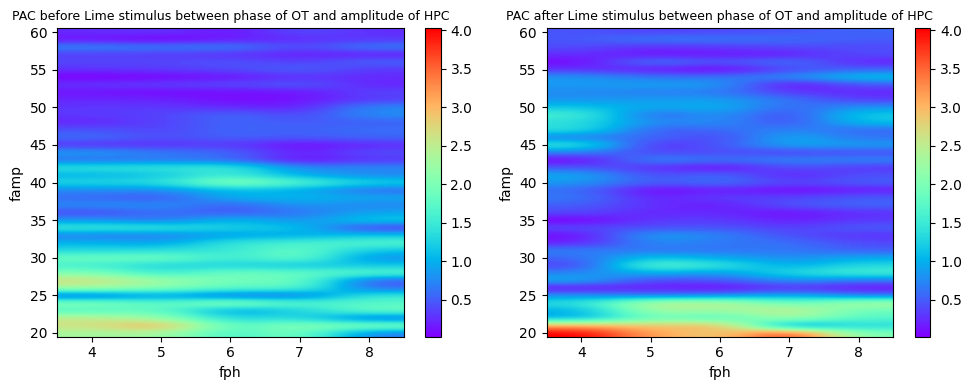

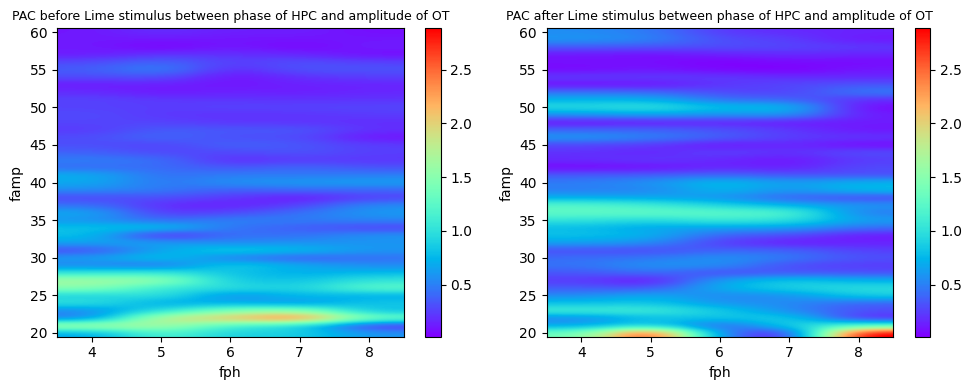

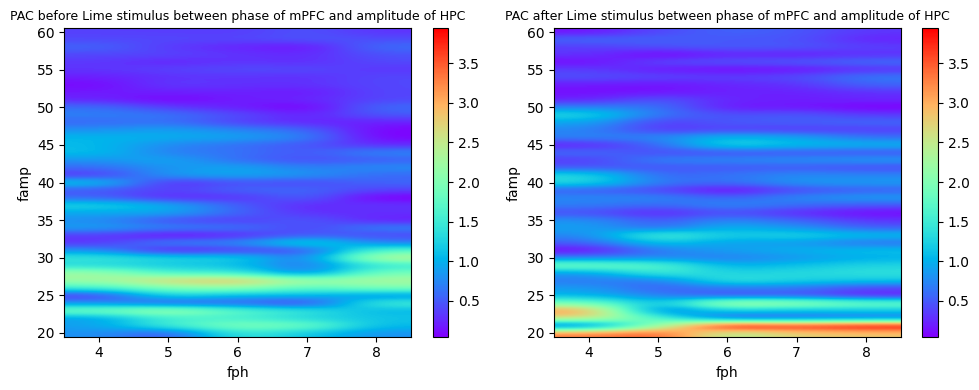

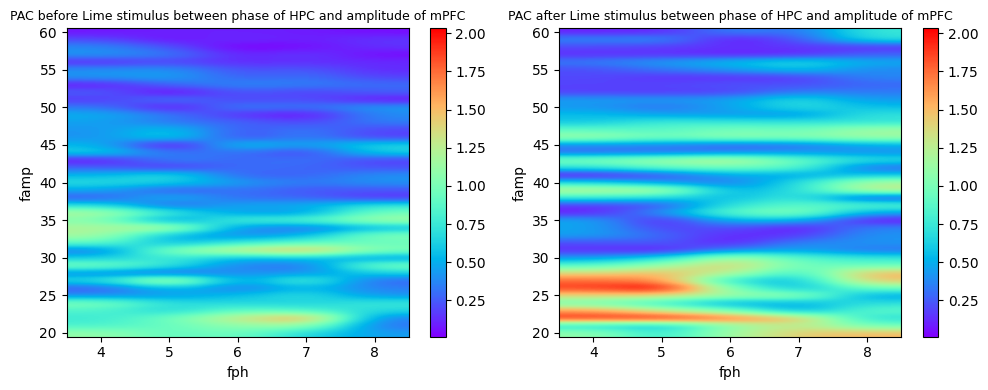

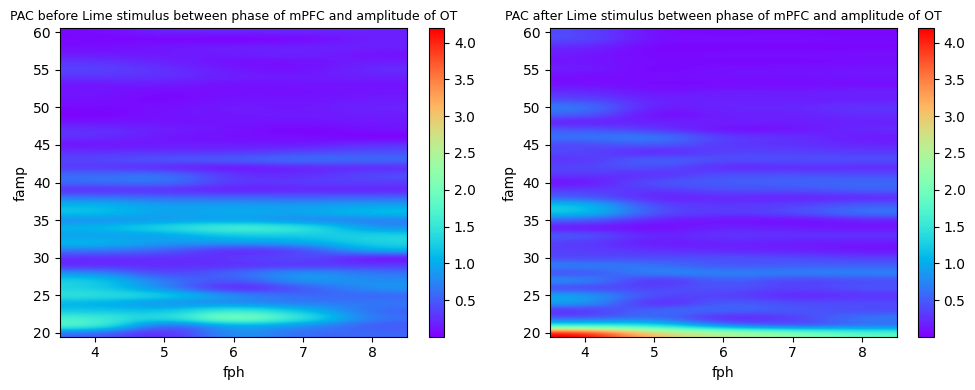

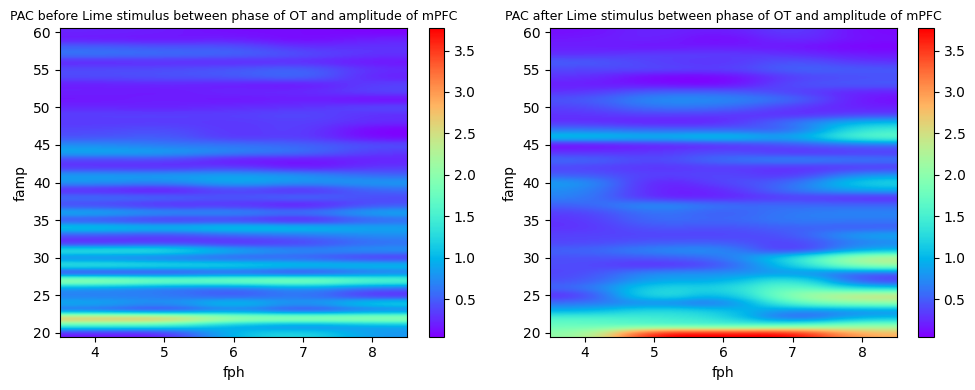

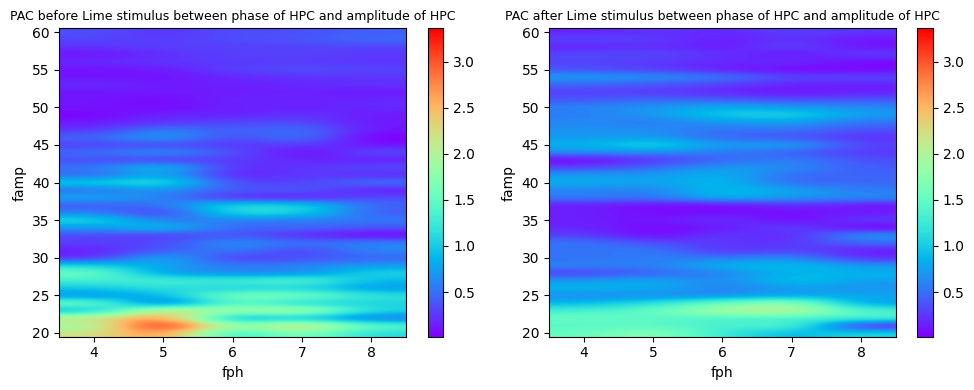

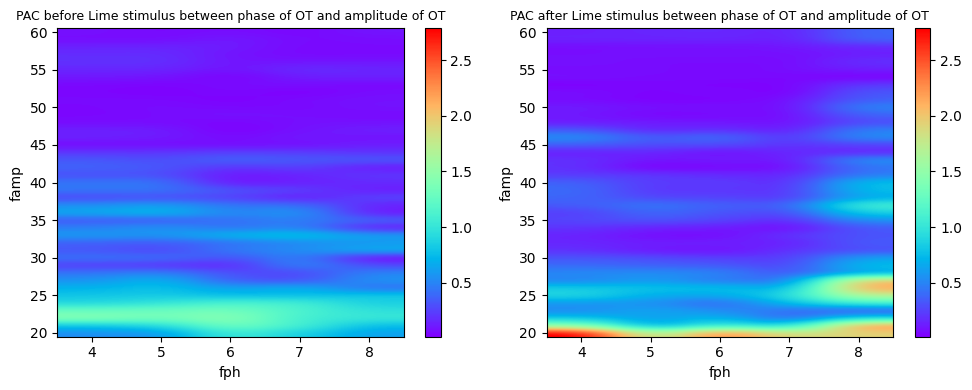

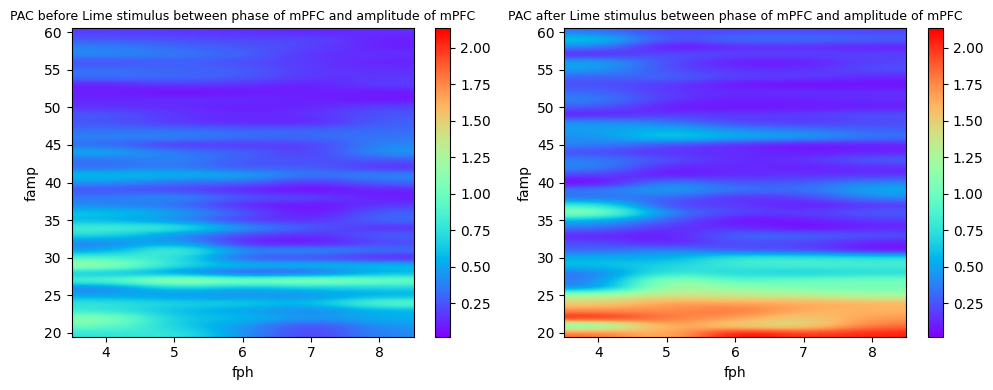

In [20]:
####################################################################
# To Do: Use your function to calculate the PAC and plot the results
####################################################################
#this part makes 24 diagrams, dont run this because it takes three minutes, I already plotted all of PAC diagrams.

PAC_plot("Banana","ch2","ch1")
PAC_plot("Banana","ch1","ch2")
PAC_plot("Banana","ch3","ch1")
PAC_plot("Banana","ch1","ch3")
PAC_plot("Banana","ch3","ch2")
PAC_plot("Banana","ch2","ch3")
PAC_plot("Banana","ch1","ch1")
PAC_plot("Banana","ch2","ch2")
PAC_plot("Banana","ch3","ch3")

PAC_plot("Lime","ch2","ch1")
PAC_plot("Lime","ch1","ch2")
PAC_plot("Lime","ch3","ch1")
PAC_plot("Lime","ch1","ch3")
PAC_plot("Lime","ch3","ch2")
PAC_plot("Lime","ch2","ch3")
PAC_plot("Lime","ch1","ch1")
PAC_plot("Lime","ch2","ch2")
PAC_plot("Lime","ch3","ch3")


You should generate plots like this between all channels for both odorants:<br>

![](./Figures/04-PAC-comodulo.png) <br>
*figure description: comodulogram of hippocampus theta phase and hippocampus low gamma amplitude*

# Time-Varying Phase-Amplitude Coupling (tv-PAC)

In this section, we aim to analyze the dynamics of Phase-Amplitude Coupling (PAC) over time. This can be achieved using a sliding window technique. Set the window size to `0.25sec` and slide it with `75%` overlap across the ERP signals for each channel in both odorants. Within each window, calculate the PAC and then average it over the phase frequency range of theta band `4Hz-8Hz`. Finally, generate time-frequency plots for PAC between each pair of channels (local PAC and inter-regional PAC). You can use the `calc_PAC()` function you've written in the previous section. Compare the results and find the effect of odorants in the neural connectivities. *`20 Points`*

In [21]:
def calc_tvPAC(data1,data2, fph_range, famp_range, t_win, overlap):
    
    times=[]
    i=-1.5

    while(i+t_win<=3):
        m=calc_PAC(data1,data2,fph_range,famp_range,[i,i+t_win])
        for j in range(len(m[:,0])):
            m[j,0]=np.mean(m[j,:])
        times.append(m[:,0])
        i=i+(1-overlap)*t_win    

    tvp=np.empty((int(famp_range[1]-famp_range[0])+1,len(times)))

    for j in range(len(times)):
        for i in range(int(famp_range[1]-famp_range[0])+1):
            tvp[i,j]=times[j][i]    

    return tvp/50        
    ##############################
    # To Do: complete the function
    ##############################
    
    

In [26]:
#function to plot images for all channels and odorants
def tvp_plot(stimulus,region1,region2,index):

    tvp=calc_tvPAC(erp[stimulus][region1],erp[stimulus][region2],[4,8],[20,60],0.25,0.75)

    dict={"ch1":"HPC","ch2":"OT","ch3":"mPFC"}
    plt.figure(index)
    im=plt.imshow(tvp,interpolation="quadric",cmap="rainbow")
    plt.yticks(np.arange(0,45,5),np.arange(60,15,-5))
    plt.xlabel("time(s)")
    plt.xticks(np.linspace(0,len(tvp[0])-1,10),np.linspace(-1.5,3,10))
    plt.ylabel("famp")
    plt.title("tv-PAC between theta phase of "+dict[region1]+" and amplitude of "+dict[region2]+", odorant= "+stimulus,fontsize=9)
    clb=plt.colorbar(im)
    clb.ax.set_title("PAC")
    plt.tight_layout()



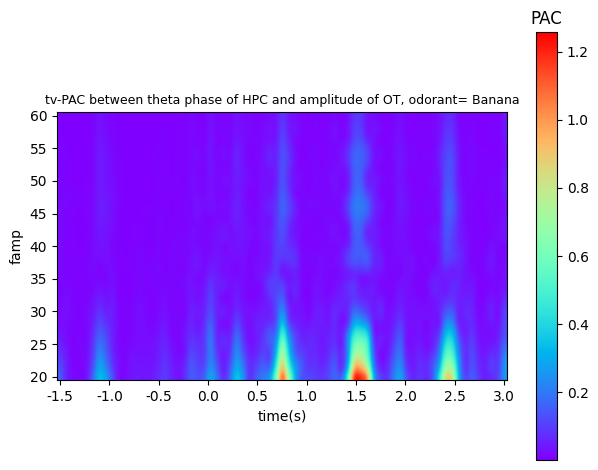

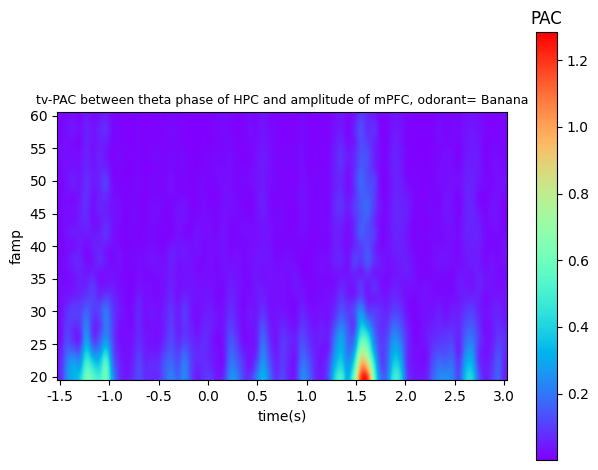

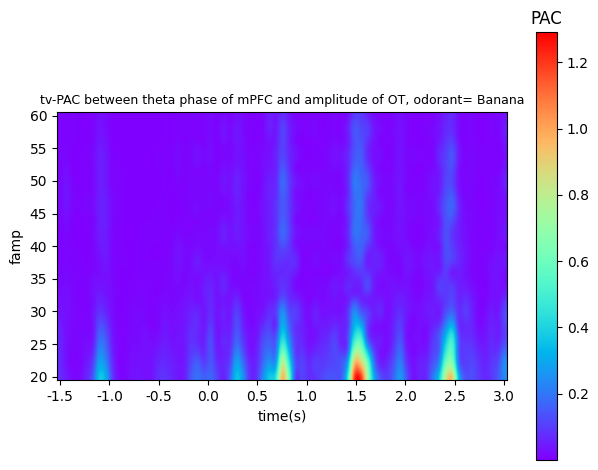

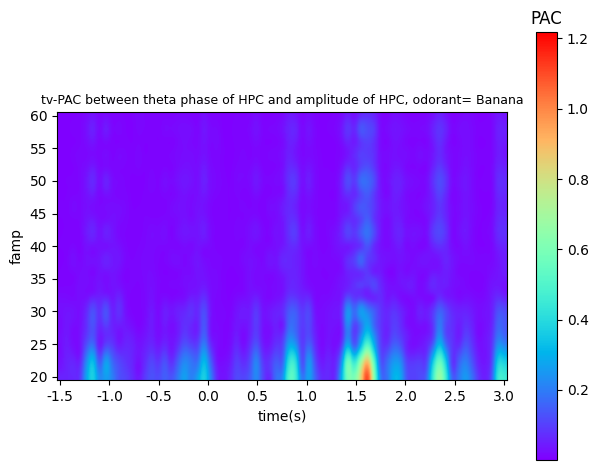

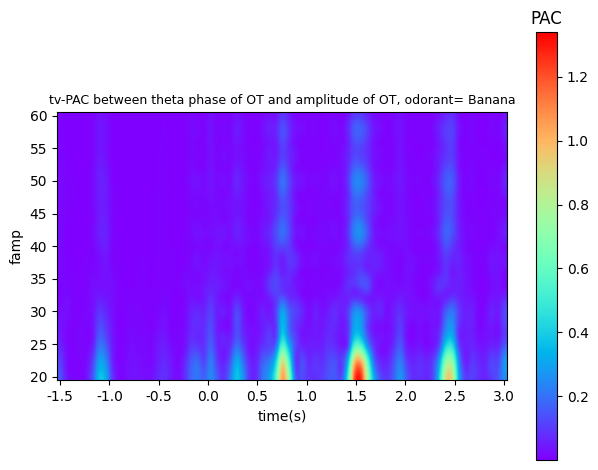

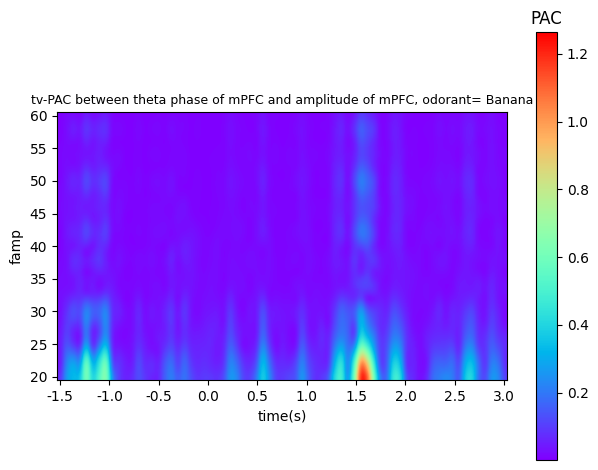

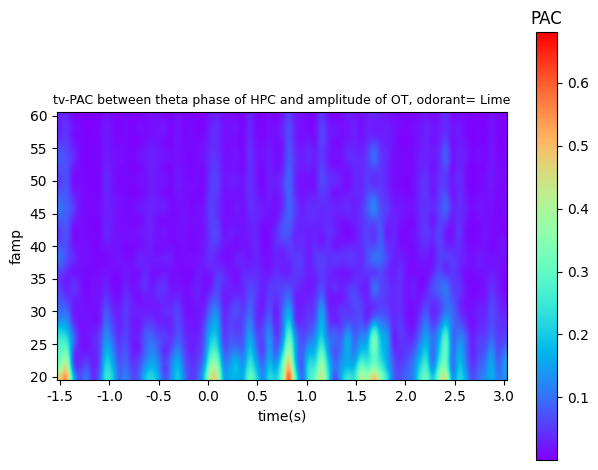

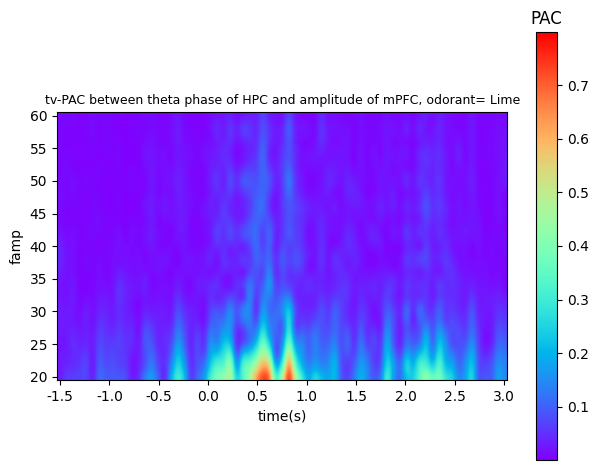

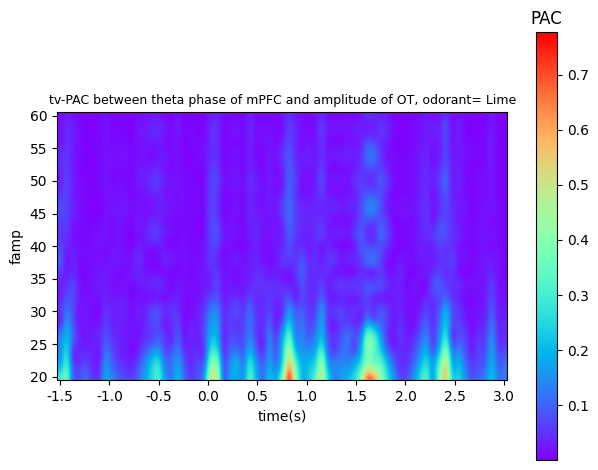

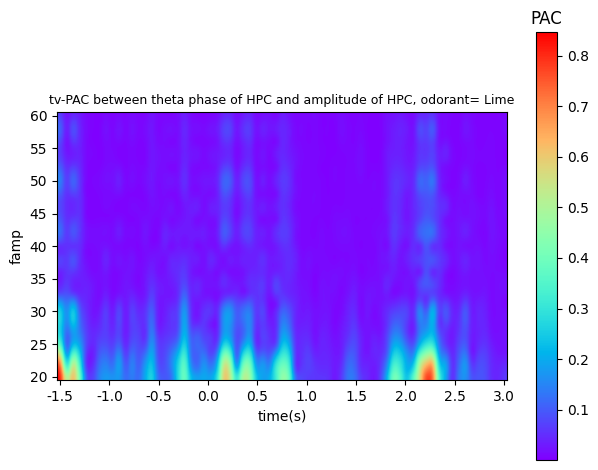

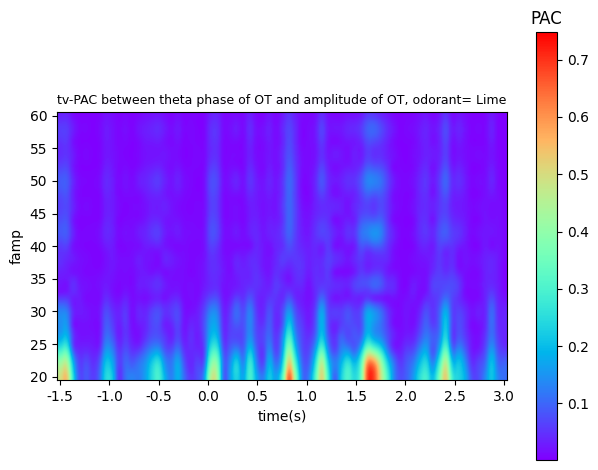

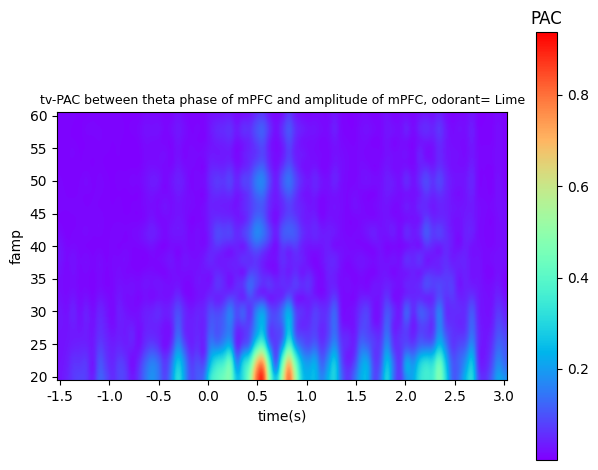

In [27]:
#plotting all of tv-PAC takes about half an hour to run!!!!!

tvp_plot("Banana","ch1","ch2",1)
tvp_plot("Banana","ch1","ch3",2)
tvp_plot("Banana","ch3","ch2",3)
tvp_plot("Banana","ch1","ch1",4)
tvp_plot("Banana","ch2","ch2",5)
tvp_plot("Banana","ch3","ch3",6)

tvp_plot("Lime","ch1","ch2",7)
tvp_plot("Lime","ch1","ch3",8)
tvp_plot("Lime","ch3","ch2",9)
tvp_plot("Lime","ch1","ch1",10)
tvp_plot("Lime","ch2","ch2",11)
tvp_plot("Lime","ch3","ch3",12)


You should generate plots like this between all channels for both odorants:<br>

![](./Figures/05-PAC-vtime.png)<br>
*figure description: tv-PAC of hippocampus theta phase and hippocampus low gamma amplitude*

# Bonus: Modulation Index (MI) `+10 Points`

The Mean Vector Length (MVL) is not the only method for calculating Phase-Amplitude Coupling (PAC); another alternative is the Modulation Index (MI). You can find a detailed explanation of this method in [this paper](https://doi.org/10.1073/pnas.0810524105).

Simply implement the MI method and compute the time-varying PAC (tv-PAC) for each channel (l-PAC) and between channels (ir-PAC) using **ERP signals**. Then, compare the results with the MVL method used in the previous section. *`7 Points`*

`Theoretical Question:` In [this paper](https://doi.org/10.3389/fnins.2019.00573), different methods for calculating PAC and PLV and Generalized-Linear-Modeling-Cross-Frequency-Coupling (GLM) are evaluated. After reading the paper, determine when we should use MVL or MI for calculating PAC. *`3 Points`*

Difference between MI and MVL methods: As opposed  to MVL method which has been calculated for all regions above, MI method is based on Shannon entropy and KL divergence of bins distribution from uniform probability density, therefore MI is sensitive to bins number and size. According to paper, MI method is recommended for noisy and short data epochs with unknown forms of coupling. Howerever, for high quality and long data epochs with monophasic coupling and a high signal-to-noise ratio, the use of the MVL is recommended.
If it is not clear whether cross-frequency coupling will be mono- or bi-phasic, the MI should be used, even though literature suggests that biphasic coupling can be neglected. The MI is quantitatively larger than the PLV and MVL. However, even despite substantial quantitative differences in values, the qualitative decision for significance of phase-amplitude coupling is the same for all four methods in our simulation. Nevertheless, comparison of coupling strengths between the methods is problematic and this lack of comparability provides another reason for reporting both, MVL and MI.     

In [24]:
def calc_MI(tfd1, tfd2, fph, famp):

    ##############################
    # To Do: complete the functions
    ##############################
    
    pass

In [25]:

####################################################################
# To Do: Use your function to calculate the PAC and plot the results
####################################################################
